In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
# 基本的なCNNのインスタンス化
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [3]:
# アーキテクチャの表示
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [4]:
# CNNの上に分類機を追加
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
# アーキテクチャの表示
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [6]:
# MNISTの画像でCNNを訓練
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['acc'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.1693 - acc: 0.9473
Epoch 2/5
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.0471 - acc: 0.9853
Epoch 3/5
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.0317 - acc: 0.9901
Epoch 4/5
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.0237 - acc: 0.9926
Epoch 5/5
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.0187 - acc: 0.9946


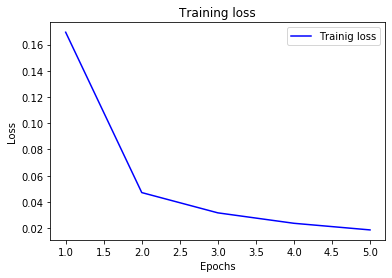

In [7]:
# 損失値をプロット
loss = history.history['loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label="Trainig loss")
plt.title("Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()

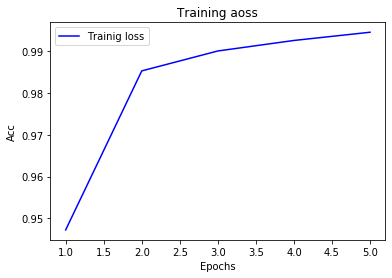

In [8]:
# 正解率をプロット
plt.clf()
acc = history.history['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label="Trainig loss")
plt.title("Training aoss")
plt.xlabel("Epochs")
plt.ylabel("Acc")

plt.legend()
plt.show()

In [9]:
# テストデータでの評価
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_loss: {}, test_acc: {}'.format(test_loss, test_acc))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

test_loss: 0.02690781091670833, test_acc: 0.9908999800682068
